In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from math import log

In [2]:
# Load results form file
results = []

with open("results_simple_cnn.txt", 'r') as f:
    for line in f:
        d = json.loads(line)
        results.append(d)
        #print(d)

In [3]:
def best_fit(X, Y):
    # func pulled from https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

In [4]:
def plotResults(x,y,xaxis="",yaxis="",title ="",leg=[],bestFit="",save=""):
    '''(list,list,string,string,list) -> None
    '''
    #for l in y:
        #plt.scatter(x,l)
    if bestFit == "linear":
        a,b = best_fit(x,y)
        yfit = [a + b * xi for xi in x]
        plt.plot(x,yfit)
        plt.scatter(x,y)
    elif bestFit == "parabolic":
        x_flt = [float(xi) for xi in x]
        y_flt = [float(xi) for xi in y]
        a = np.array(x_flt)
        b = np.array(y_flt)
        z = np.polyfit(a,b,2) # 2 degree polynom
        f = np.poly1d(z) # format polynomial
        x_new = np.linspace(x_flt[0]-.25, x_flt[-1]+.25)
        y_new = f(x_new)
        plt.plot(x_flt,y_flt,'o', x_new, y_new)
        plt.xlim([x_flt[0]-.25, x_flt[-1]+.25 ])
    else:
        plt.scatter(x,y)
    #plt.legend(leg, loc='upper left')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    print(save)
    plt.savefig(save)
    plt.show()

In [5]:
def plotBarResults(x,y,error,xaxis="",yaxis="",title ="",leg=[],bestFit="",save=""):
    '''(list,list,string,string,list) -> None
    '''
    #for l in y:
        #plt.scatter(x,l)
    plt.bar(x,y,yerr=error)
    #plt.legend(leg, loc='upper left')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    print(save)
    plt.savefig(save)
    plt.show()

In [6]:
def multiPlotResults(x,y,xaxis="",yaxis="",title="",leg=[], legspot='upper right',bestFit="", save=""):
    '''(list,list,string,string,list) -> None
    '''
    col = ['red','green','blue','yellow','yellow']
    for i in range(len(x)):
        if bestFit=="parabolic":
            x_flt = [float(xi) for xi in x[i]]
            y_flt = [float(xi) for xi in y[i]]
            a = np.array(x_flt)
            b = np.array(y_flt)
            z = np.polyfit(a,b,2) # 2 degree polynom
            f = np.poly1d(z) # format polynomial
            x_new = np.linspace(x_flt[0]-.25, x_flt[-1]+.25)
            y_new = f(x_new)
            plt.plot(x_flt,y_flt,'o', x_new, y_new, color=col[i])
            plt.xlim([x_flt[0]-.25, x_flt[-1]+.25 ])
        else:
            plt.scatter(x[i],y[i])
    plt.legend(leg, loc=legspot)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    print(save)
    plt.savefig(save)
    plt.show()

('1', '2', '3', '4', '5', '6', '7')
(0.0167738649397808, 0.01660860115634654, 0.02104775725789275, 0.0210215295128041, 0.013574420150546312, 0.024465997266496044, 0.029458621139454102)
images/EffectofFilterSize.png


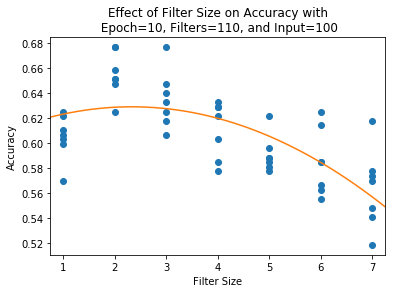

images/EffectofFilterSizeBar.png


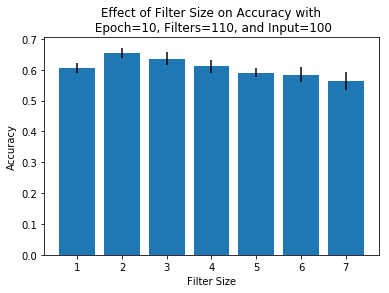

In [7]:
a = []
k = []
# Vary kernel and see accuracy
for line in results:
    if line['epochs'] == 10 and line['num_filters'] == 110 and line['input_shape'] == '(100, 100, 3)':
        #print(line)
        a.append(line['accuracy'])
        k.append(line['kernel'][1])
        #print("acc: {}, kern: {}".format(line['accuracy'], line['kernel'][1]))

z = zip(k,a)
d=dict()
for l in z:
    if l[0] not in d:
        d[l[0]] = [l[1]]
    else:
        d[l[0]].append(l[1])

nparrd={x:np.array(y) for x,y in d.items()}
std={x:np.std(y) for x,y in nparrd.items()}
avg={x:np.mean(y) for x,y in nparrd.items()}
keys, values = zip(*avg.items())
skeys, svalues = zip(*std.items())
print(keys)
print(svalues)

plotResults(k,a,"Filter Size", "Accuracy", "Effect of Filter Size on Accuracy with\n Epoch=10, Filters=110, and Input=100","","parabolic", "images/EffectofFilterSize.png")
plotBarResults(keys,values,svalues,"Filter Size", "Accuracy", "Effect of Filter Size on Accuracy with\n Epoch=10, Filters=110, and Input=100","","parabolic", "images/EffectofFilterSizeBar.png")

images/EffectofNumberofFilters.png


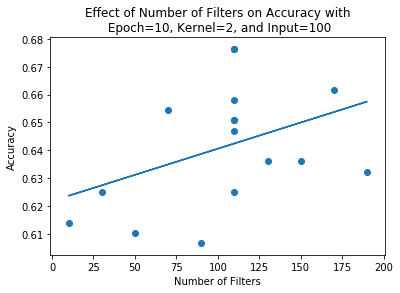

In [8]:
a = []
k = []
# Vary number of filters and see accuracy
# Assuming Linear Relation
for line in results:
    if line['epochs'] == 10 and line['kernel'] == '(2, 2)' and line['input_shape'] == '(100, 100, 3)':
        a.append(line['accuracy'])
        k.append(line['num_filters'])
        #print("acc: {}, kern: {}".format(line['accuracy'], line['num_filters']))
   
plotResults(k,a,"Number of Filters", "Accuracy", "Effect of Number of Filters on Accuracy with\n Epoch=10, Kernel=2, and Input=100","" ,"linear","images/EffectofNumberofFilters.png") 

images/EffectofKernelSizesatInputSizes.png


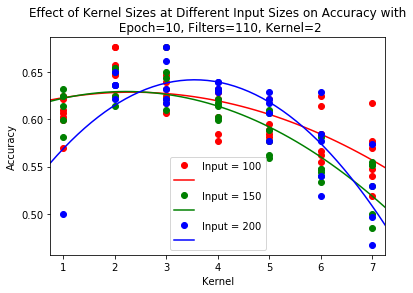

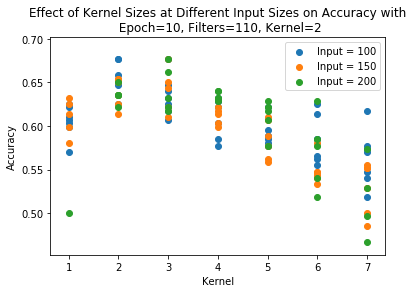

In [9]:
a = []
a100 = []
a150 = []
a200 = []
k = []
k100 = []
k150 = []
k200 = []
# Vary image size,kernel size and see accuracy
for line in results:
    
    if line['epochs'] == 10 and line['num_filters'] == 110:
        #print(line)
        if line['input_shape'][1:4] == "100":
            a100.append(line['accuracy'])
            k100.append(line['kernel'][1])
        elif line['input_shape'][1:4] == "150":
            a150.append(line['accuracy'])
            k150.append(line['kernel'][1])
        elif line['input_shape'][1:4] == "200":
            a200.append(line['accuracy'])
            k200.append(line['kernel'][1])
        
        #k.append(line['input_shape'][1:4])
k.append(k100)
k.append(k150)
k.append(k200)
a.append(a100)
a.append(a150)
a.append(a200)
#print(k)
#print(a)

multiPlotResults(k,a,"Kernel", "Accuracy", "Effect of Kernel Sizes at Different Input Sizes on Accuracy with\n Epoch=10, Filters=110, Kernel=2",['Input = 100','', 'Input = 150', '', 'Input = 200',''],'lower center', "parabolic", "images/EffectofKernelSizesatInputSizes.png")     
multiPlotResults(k,a,"Kernel", "Accuracy", "Effect of Kernel Sizes at Different Input Sizes on Accuracy with\n Epoch=10, Filters=110, Kernel=2",['Input = 100', 'Input = 150', 'Input = 200'])     